<a href="https://colab.research.google.com/github/rosembergennes/python/blob/master/POSITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregando as BIBLIOTECAS 

In [1]:
!apt update
!apt install chromium-chromedriver
!pip install selenium
!pip install dnspython

import time
from datetime import datetime, timedelta
from selenium import webdriver
import requests
import pandas as pd
from google.colab import files
import os
import numpy as np
from pandas import DataFrame
import pandas as pd
from datetime import timedelta, date ,datetime
from decimal import Decimal
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime
from pymongo import MongoClient
import pprint
import datetime
import json
# Importando numpy
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date ,datetime
pd.options.display.max_columns = None
pd.options.display.max_rows = None


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [95.7 kB]
Get:13 http://ppa.launchp

## OBTENDO DADOS DO ATLAS MONGODB

In [2]:
# obtendo dados do atlas mongodb
client = MongoClient("XXXXXXXXXXXXX")
db = client.acoes
collection = db.bolsabrasil
data = pd.DataFrame(list(collection.find()))


In [3]:
# limpeza dos dados em Branco 
data = data.dropna(subset=['SETOR'])
data = data.loc[(data['SETOR'] != "")]

## ANALISANDO NEGOCIAÇÕES POR SETOR

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 7980
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   _id        7717 non-null   object        
 1   DATPRG     7717 non-null   datetime64[ns]
 2   CODBDI     7717 non-null   int64         
 3   CODNEG     7717 non-null   object        
 4   NOMRES     7717 non-null   object        
 5   ESPECI     7717 non-null   object        
 6   PREABE     7717 non-null   float64       
 7   PREMAX     7717 non-null   float64       
 8   PREMIN     7717 non-null   float64       
 9   PREULT     7717 non-null   float64       
 10  PREOFC     7717 non-null   float64       
 11  PREOFV     7717 non-null   float64       
 12  VOLTOT     7717 non-null   float64       
 13  VALAF      7717 non-null   float64       
 14  VALMM      7717 non-null   float64       
 15  PERCAF     7717 non-null   float64       
 16  PERCMM     7717 non-null   float64       


In [5]:
# São definidos os seguintes setores de negociação na bolsa de valores.
data['SETOR'].unique()

array(['Saúde', 'Energia Elétrica', 'Serviços', 'Construção e Engenharia',
       'Hoteis e Restaurantes', 'Financeiros', 'Máquinas e Equipamentos',
       'Tecidos, Vestuário e Calçados', 'Previdência e Seguros',
       'Holdings Diversificadas', 'Água e Saneamento',
       'Exploração de Imóveis', 'Comércio', 'Mineração',
       'Serviços Financeiros Diversos', 'Alimentos', 'Viagens e Lazer',
       'Transporte', 'Bebidas', 'Diversos', 'Outros',
       'Prods. de Uso Pessoal e de Limpeza',
       'Petróleo, Gás e Biocombustíveis', 'Químicos', 'Agropecuária',
       'Siderurgia e Metalurgia', 'Madeira e Papel',
       'Programas e Serviços', 'Comércio e Distribuição',
       'Telefonia Fixa', 'Computadores e Equipamentos', 'Mídia', 'Gás',
       'Material de Transporte', 'Utilidades Domésticas',
       'Telefonia Móvel', 'Equipamentos Elétricos', 'Embalagens'],
      dtype=object)

In [56]:
# Funcoes Matematicas.
# Soma dos valores de um DataFrame >> df.sum()
# Menor valor de um DataFrame >> df.min()
# Maior valor >> df.max()
# Média dos valores   >> df.mean()
# Mediana dos valores >> df.median()

# Utilizando sum by group sobre a Column *PERCAF obteremos o ranque dos setores
# *PERCAF ( percentual Abertura / Fechamento)

# Para manter as colunas originais 'SETOR','PERCAF', usaremos reset_index(). 
# Caso contrário, 'SETOR'  tornará parte do índice.

df_analise_setor=data.groupby(['SETOR'])['PERCAF'].sum().reset_index()
df_analise_setor.head(8)

,SETOR,PERCAF
0,Agropecuária,-8.06
1,Alimentos,-52.65
2,Bebidas,-11.20
3,Computadores e Equipamentos,-9.32
4,Comércio,-38.47
5,Comércio e Distribuição,-71.50
6,Construção e Engenharia,-417.47
7,Diversos,-49.31


In [7]:
# MENORES RENTABILIDADES PERCENTUALMENTE
df_analise_setor_menor_rentabilidade= df_analise_setor.sort_values("PERCAF",ascending=True)
df_analise_setor_menor_rentabilidade.head(7)

,SETOR,PERCAF
6,Construção e Engenharia,-417.47
9,Energia Elétrica,-416.15
12,Financeiros,-295.66
31,"Tecidos, Vestuário e Calçados",-181.00
21,Outros,-146.56
11,Exploração de Imóveis,-138.06
17,Material de Transporte,-103.66


In [8]:
# MAIOR RENTABILIDADES PERCENTUALMENTE
df_analise_setor_maior_rentabilidade= df_analise_setor.sort_values("PERCAF",ascending=False)
df_analise_setor_maior_rentabilidade.head(7)

,SETOR,PERCAF
14,Holdings Diversificadas,116.50
19,Máquinas e Equipamentos,57.07
16,Madeira e Papel,22.81
30,Siderurgia e Metalurgia,15.41
13,Gás,14.51
10,Equipamentos Elétricos,-0.02
25,Programas e Serviços,-0.74


## GERANDO GRAFICOS PERCENTUAL POR SETOR

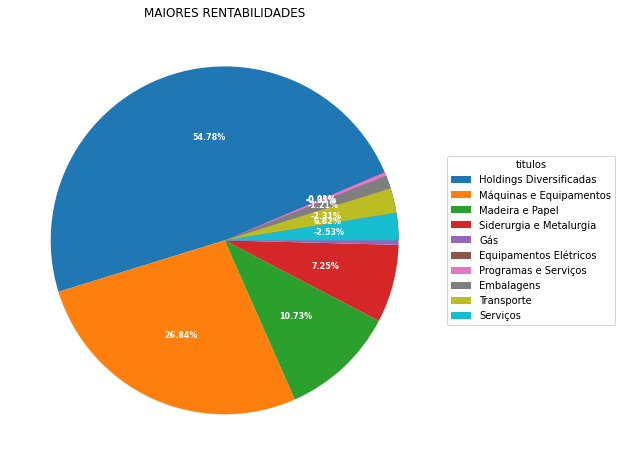

In [9]:
# Area de plotagem do Grafico definindo o tamanho figsize=(8,8)
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

# Matriz dos dados (valores,titulos)
valores =  df_analise_setor_maior_rentabilidade["PERCAF"].head(10)
titulos =  df_analise_setor_maior_rentabilidade["SETOR"].head(10)

# Calculo para porcentagem dentro do grafico
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%".format(pct, absolute)

# Criando o grafico e acertando as legendas
wedges, texts, autotexts = ax.pie(valores, autopct=lambda pct: func(pct, valores),
                                  textprops=dict(color="w"))

ax.legend(wedges, titulos,
          title="titulos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("MAIORES RENTABILIDADES")

plt.show()

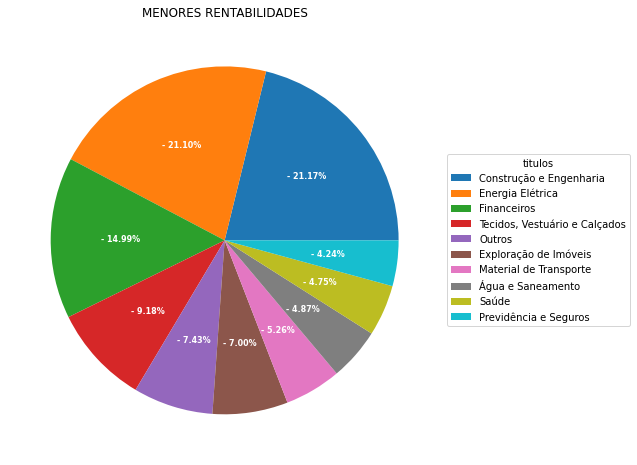

In [10]:
# Area de plotagem do Grafico definindo o tamanho figsize=(8,8)
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

# Matriz dos dados (valores,titulos)
# <<< COMO VALORES SÃO NEGATIVOS TRANSFORMO EM POSSITIVO >>>
# <<< E PARA NÃO FICAR DUVIDA COLOCO UM - NO LABEL DO RETURN >>>
valores =  abs(df_analise_setor_menor_rentabilidade["PERCAF"]).head(10)
titulos =  df_analise_setor_menor_rentabilidade["SETOR"].head(10)

# Calculo para porcentagem dentro do grafico 
# <<<< COMO OS VALORES SÃO NEGATIVO return"-  >>>>
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "- {:.2f}%".format(pct, absolute)

# Criando o grafico e acertando as legendas
wedges, texts, autotexts = ax.pie(valores, autopct=lambda pct: func(pct, valores),
                                  textprops=dict(color="w"))

ax.legend(wedges, titulos,
          title="titulos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("MENORES RENTABILIDADES")

plt.show()

## ANALISANDO MELHORES EMPRESAS PARA INVESTIMENTO A LONGO PRAZO ( ainda não acabei )

In [12]:
# Preço da ação dividido pelo lucro por ação. 
# O P/L é o número de anos que se levaria para reaver o capital aplicado na compra de uma ação,
# através do recebimento do lucro gerado pela empresa, considerando que esses lucros permaneçam constantes.

In [13]:
# Analisando por oportunidade de ganho a longo prazo. Os investimentos devem ser focados em acoes dos setores que estão em baixa,
# que devido a natureza do mercado financeiro futuramente poderão se recupera fornecendo assim maior margem de lucro.
# Nota ==> para que a afirmação acima seja verdadeira temos que analisar o perfil da ação disponibilizada pela empresa,
#          assim temos que levar em consideração os seguintes intes.
# 1.) Filtra por => Ações Preferenciais, são todas as ações com o campo ESPECI contendo a String PN  
#                  (este tipo de ação alem do rendimento paga dividendos e se os dividendos não forem recuperados converten-se em mais ações).
# 2.) Filtra por => Giro ativo positivo (Receita Líquida dividido por Ativos Totais. 
#                   Indica a eficiência com a qual a empresa usa seus ativos para gerar vendas), positivo.
# 3.) Ordeno do maior para o menor Giro


In [39]:
# seleciona linhas que contêm a palavra PN
# OBS :
# Qualquer coisa que não seja uma string não pode ter métodos de string aplicados, 
# então o resultado é NaN (naturalmente).
# Só colocamos na=False para esclarecer pois já realizamos esta limpeza em processos anteriores.
# https://www.euqueroinvestir.com/qual-a-diferenca-de-acoes-preferenciais-e-ordinarias-e-qual-a-melhor-opcao/

df_pn =data[data['ESPECI'].str.contains("PN", na=False )]
# df_pn.head()
df_empresas_saudaves=df_pn.query('GIROATIVO >0 & VPA >0 & VPA <PREULT')
df_empresas_saudaves.head()

,_id,DATPRG,CODBDI,CODNEG,NOMRES,ESPECI,PREABE,PREMAX,PREMIN,PREULT,PREOFC,PREOFV,VOLTOT,VALAF,VALMM,PERCAF,PERCMM,EMPRESA,SETOR,SUBSETOR,VALMERC,VALFIRMA,NUACOES,PL,CRESULT5,VPA,GIROATIVO
9,5f2be5e43427840390ba0344,2020-08-05,2,BALM4,BAUMER,PN,13.09,13.50,12.30,12.79,12.51,12.80,169017.0,-0.30,1.20,-2.35,8.89,BAUMER PN,Máquinas e Equipamentos,Máqs. e Equips. Hospitalares,1.253420e+08,1.431420e+08,9.800000e+06,18.01,7.1,10.76,0.72
12,5f2be5e43427840390ba0331,2020-08-05,2,ALPA4,ALPARGATAS,PN N1,32.30,34.36,32.11,34.00,34.00,34.01,181398120.0,1.70,2.25,5.00,6.55,ALPARGATAS PN N1,"Tecidos, Vestuário e Calçados",Calçados,1.999410e+10,1.985260e+10,5.880620e+08,75.21,-4.4,4.85,0.48
34,5f2be5e43427840390ba0335,2020-08-05,2,ALUP4,ALUPAR,PN N2,7.15,7.21,7.12,7.12,7.12,7.23,98733.0,-0.03,0.09,-0.42,1.25,ALUPAR PN N2,Energia Elétrica,Energia Elétrica,6.259270e+09,1.147230e+10,8.791110e+08,9.36,32.5,5.92,0.23
71,5f2be5e43427840390ba0385,2020-08-05,2,CLSC4,CELESC,PN N2,54.65,54.67,53.50,54.67,53.51,54.68,216967.0,0.02,1.17,0.04,2.14,CELESC PN N2,Energia Elétrica,Energia Elétrica,2.108730e+09,3.381640e+09,3.857200e+07,5.94,6.7,40.21,0.85
78,5f2be5e43427840390ba03d5,2020-08-05,2,ITSA4,ITAUSA,PN N1,10.34,10.39,10.06,10.20,10.20,10.21,368981450.0,-0.14,0.33,-1.37,3.18,ITAÚSA PN N1,Financeiros,Bancos,8.579030e+10,8.680730e+10,8.410810e+09,9.71,2.2,6.18,0.08


In [62]:
# Para obtermos as empresas mais seguras dentro do dataframe das empresas saudaves devemos : 
# 1.) Obter o ultimo pregão atraves da ultima data registrada.
# 2.) Calcular o possivel crescimento ( POS_CRESC ),  levando-se em consideração :
#     PREULT ( ultimo preco de fechamento ),  diminuir de
#     VPA    ( Valor Patrimonial por Ação: Valor do Patrimônio Líquido dividido pelo número total de ações.) 
#     POS_CRESC = PREULT-VPA
#
# 3.) Uma vez obtido o POS_CRESC devemos ordernar do menor para o maior 
# 4.) Isto feito selecionamos os 10 mais e enviamos para o grafico.

# 1.)
ultimadata = df_empresas_saudaves.DATPRG.max()
selecao = (df_empresas_saudaves['DATPRG'] == ultimadata ) 
df_pos_cres=df_empresas_saudaves[selecao] 
# Como o indice ficou muito zuado e eu não tava afim de receber 
# SettingWithCopyWarning: A value is trying to be set on a copy of a slice  from
# a DataFrame é que você está tentando fazer uma operação chamada chained indexing, 
# Adotamos refazer o indice
df_pos_cres = df_pos_cres.reset_index(drop=True) 
# df_pos_cres.head()

# 2.)
df_pos_cres['POS_CRESC']=df_pos_cres['PREULT']-df_pos_cres['VPA']
# df_pos_cres.head()

# 3.) 
df_pos_cres_ordenado= df_pos_cres.sort_values("POS_CRESC",ascending=True)
# df_pos_cres_ordenado.head()

# 4.)
df_pos_cres_ordenado_top10=df_pos_cres_ordenado.head(10).reset_index(drop=True)
df_pos_cres_ordenado_top10.head()

,_id,DATPRG,CODBDI,CODNEG,NOMRES,ESPECI,PREABE,PREMAX,PREMIN,PREULT,PREOFC,PREOFV,VOLTOT,VALAF,VALMM,PERCAF,PERCMM,EMPRESA,SETOR,SUBSETOR,VALMERC,VALFIRMA,NUACOES,PL,CRESULT5,VPA,GIROATIVO,POS_CRESC
0,5f52f31ab03877fddbbdf58b,2020-09-04,2,BALM4,BAUMER,PN,11.73,12.09,11.73,12.09,11.74,12.09,29615.0,0.36,0.36,3.07,2.98,BAUMER PN,Máquinas e Equipamentos,Máqs. e Equips. Hospitalares,1.184820e+08,1.256920e+08,9.800000e+06,7.34,9.7,11.72,0.70,0.37
1,5f52f31ab03877fddbbdf666,2020-09-04,2,POMO4,MARCOPOLO,PN N2,2.89,3.03,2.87,3.00,3.00,3.01,48712136.0,0.11,0.16,3.81,5.28,MARCOPOLO PN N2,Material de Transporte,Material Rodoviário,2.840680e+09,4.147480e+09,9.468930e+08,25.69,14.8,2.61,0.69,0.39
2,5f52f31ab03877fddbbdf57d,2020-09-04,2,ALUP4,ALUPAR,PN N2,7.12,7.13,7.01,7.05,7.05,7.12,94049.0,-0.07,0.12,-0.98,1.68,ALUPAR PN N2,Energia Elétrica,Energia Elétrica,6.197730e+09,1.194440e+10,8.791110e+08,9.84,35.0,6.04,0.24,1.01
3,5f52f31ab03877fddbbdf682,2020-09-04,2,SAPR4,SANEPAR,PN N2,5.43,5.52,5.36,5.45,5.45,5.47,16924260.0,0.02,0.16,0.37,2.90,SANEPAR PN,Água e Saneamento,Água e Saneamento,8.236070e+09,1.101430e+10,1.511210e+09,7.04,10.4,4.29,0.38,1.16
4,5f52f31ab03877fddbbdf6cd,2020-09-04,8,OIBR4,OI,PN N1,2.80,2.90,2.63,2.85,2.85,2.86,55134864.0,0.05,0.27,1.79,9.31,OI ON N1,Telefonia Fixa,Telefonia Fixa,1.696950e+10,3.704460e+10,5.954210e+09,-0.96,-7.9,1.36,0.26,1.49


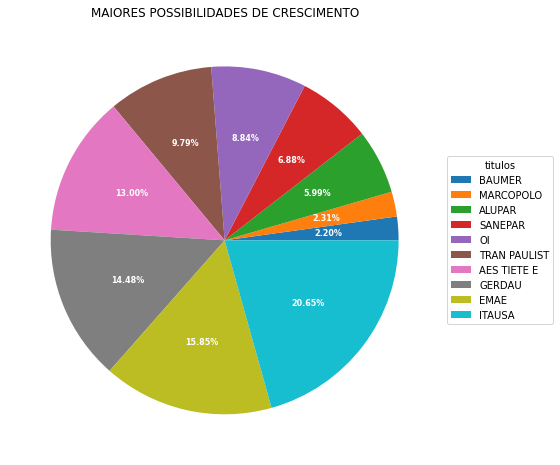

In [64]:
# Area de plotagem do Grafico definindo o tamanho figsize=(8,8)
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

# Matriz dos dados (valores,titulos)
valores =  df_pos_cres_ordenado_top10["POS_CRESC"].head(10)
titulos =  df_pos_cres_ordenado_top10["NOMRES"].head(10)

# Calculo para porcentagem dentro do grafico
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%".format(pct, absolute)

# Criando o grafico e acertando as legendas
wedges, texts, autotexts = ax.pie(valores, autopct=lambda pct: func(pct, valores),
                                  textprops=dict(color="w"))

ax.legend(wedges, titulos,
          title="titulos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("MAIORES POSSIBILIDADES DE CRESCIMENTO")

plt.show()